## Project 1 : Stock Market Prediction

### Objective :
 The objective of this project is to develop a predictive model using Nifty Bank Stock Market data from 2018 to 2021 to accurately forecast whether the stock value will increase or decrease on the next trading day. By analyzing historical data, market trends, and relevant factors, the aim is to build a robust model that can classify whether the stock value will go up or down, providing valuable insights for making informed investment decisions in the Nifty Bank Stock Market.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

##  Kaggle Dataset: Nifty Bank Stock Market Data (2018-2021)

In [2]:
df=pd.read_csv(r"D:\DATA SCIENCE\Internship\CodeClause\Stock Market Prediction\bank_nifty.csv", parse_dates = ['Date'], index_col = 'Date')

In [3]:
# Dataset First Look
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-01,25565.75,25588.00,25271.55,25318.10,57576913
2018-01-02,25382.20,25425.50,25232.80,25338.25,72033811
2018-01-03,25425.75,25454.90,25300.90,25318.60,59730356
2018-01-04,25367.65,25490.35,25310.30,25462.60,105995860
2018-01-05,25524.45,25643.35,25499.55,25601.85,123622612


In [4]:
# Dataset Rows & Columns count
df.shape

(955, 5)

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 955 entries, 2018-01-01 to 2021-11-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    955 non-null    float64
 1   High    955 non-null    float64
 2   Low     955 non-null    float64
 3   Close   955 non-null    float64
 4   Volume  955 non-null    object 
dtypes: float64(4), object(1)
memory usage: 44.8+ KB


In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### There are no null values or duplicates present in the data.

In [8]:
# Changing data type of Volume column from object to numeric
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 955 entries, 2018-01-01 to 2021-11-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    955 non-null    float64
 1   High    955 non-null    float64
 2   Low     955 non-null    float64
 3   Close   955 non-null    float64
 4   Volume  946 non-null    float64
dtypes: float64(5)
memory usage: 44.8 KB


In [10]:
# Dataset Describe
df.describe()

,Open,High,Low,Close,Volume
count,955.000000,955.000000,955.000000,955.000000,9.460000e+02
mean,28575.225969,28805.647958,28291.096178,28550.485812,2.939273e+08
std,4823.393891,4813.805396,4831.728274,4827.044525,1.685266e+08
min,16759.950000,17681.700000,16116.250000,16917.650000,1.896656e+07
25%,25487.200000,25651.575000,25252.175000,25443.475000,1.718657e+08
50%,27972.950000,28185.150000,27777.400000,28021.700000,2.615711e+08
75%,31523.500000,31742.175000,31240.750000,31515.000000,3.690681e+08
max,41234.550000,41829.600000,40829.150000,41238.300000,1.568143e+09


### EXPLORATORY DATA ANALYSIS

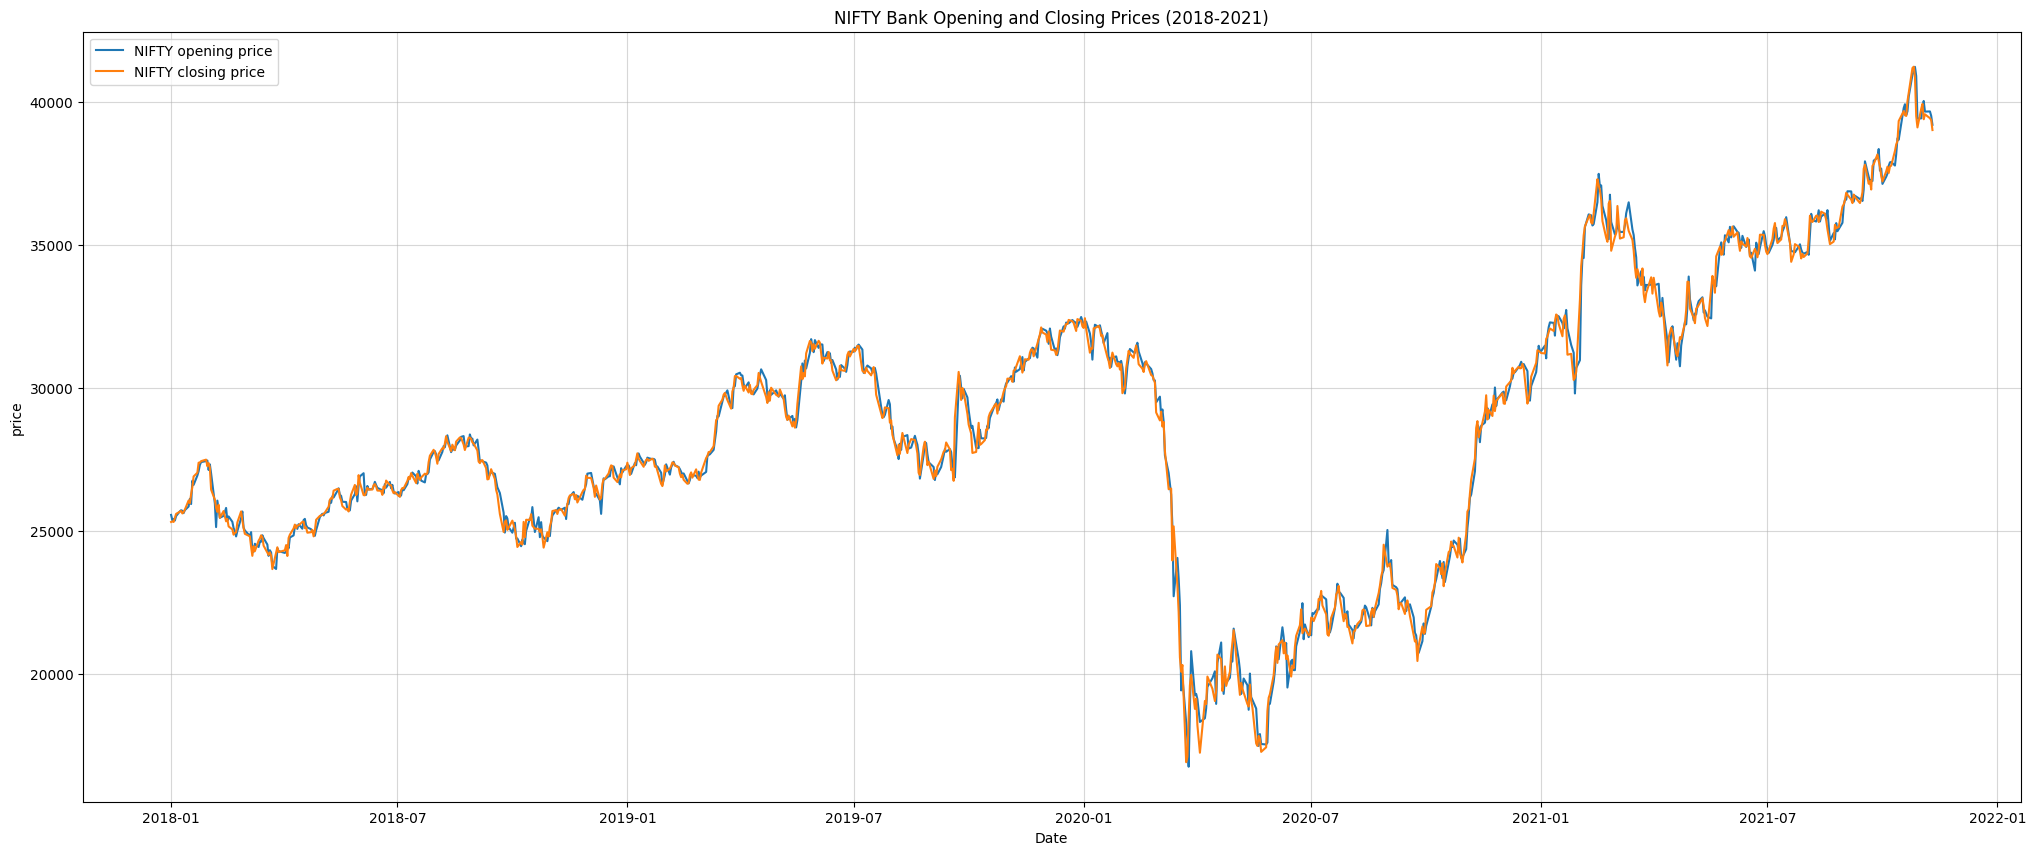

In [11]:
plt.figure(figsize=(25,10))
sns.lineplot(x=df.index, y='Open', data=df,label='NIFTY opening price')
sns.lineplot(x=df.index, y='Close', data=df,label='NIFTY closing price')
plt.ylabel('price')
plt.grid(alpha=0.5)
plt.title('NIFTY Bank Opening and Closing Prices (2018-2021)')
plt.legend()
plt.show()

### Insights:
* The plot displays the trend of NIFTY Bank opening and closing prices over the specified period, offering insights into the market behavior.
* In the year 2020, there is a noticeable dip in the NIFTY Bank prices, indicating a period of decline or bearish market sentiment during that time because of Covid19 Pandemic.
* Following the dip in 2020, the plot shows an increasing trend in NIFTY Bank prices, suggesting a recovery or a shift towards a bullish market sentiment in the subsequent period.
* The plot helps visualize the overall volatility and fluctuations in the NIFTY Bank prices over the examined period, highlighting periods of both growth and decline.

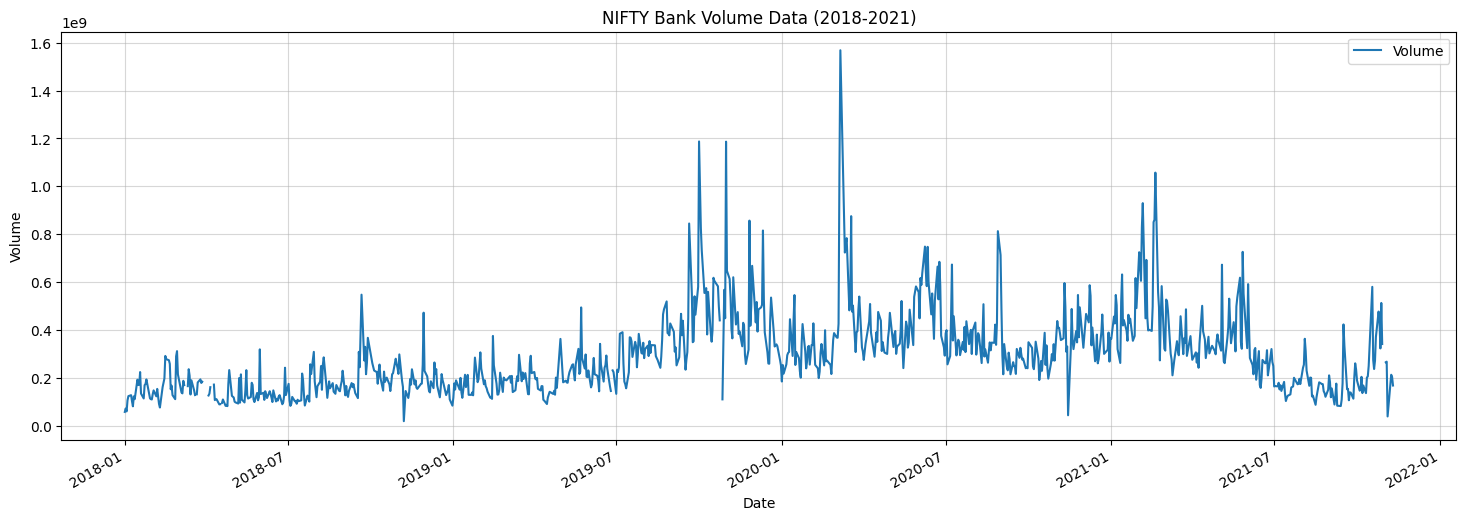

In [12]:
# Volume w.r.t Date
plt.figure(figsize=(18, 6))
df['Volume'].plot(legend=True)
plt.grid(alpha=0.5)
plt.title('NIFTY Bank Volume Data (2018-2021)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

### Insights:
1. The plot illustrates the trend of NIFTY Bank trading volume over the specified period, providing insights into the level of market activity.
2. Around the end of the first quarter of year 2020, the plot reveals a peak in the trading volume, indicating a period of significantly high market participation and increased buying or selling activity.
3. The observed highest volume at the end of the first quarter suggests a potential event or market condition that attracted a large number of traders and investors, resulting in increased trading activity.It is due to the widespread impact of Coronavirus Pandemic.
4. This insight highlights the importance of monitoring trading volume as it can provide indications of market interest, liquidity, and potential price movements.

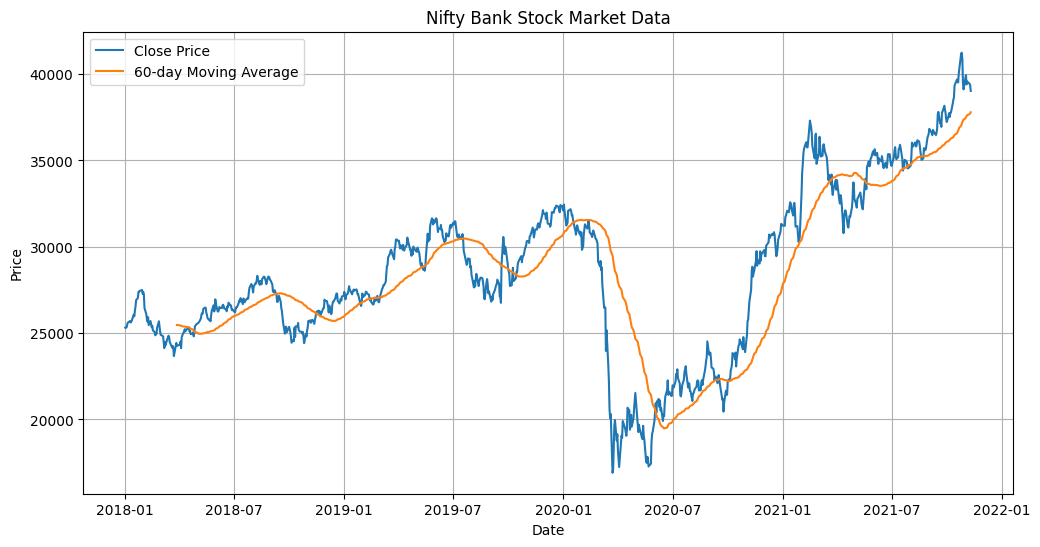

In [13]:
# Calculate the 60-day moving average
window = 60
# Plotting the Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['Close'].rolling(window).mean(), label=f'{window}-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Nifty Bank Stock Market Data')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 2000x600 with 0 Axes>

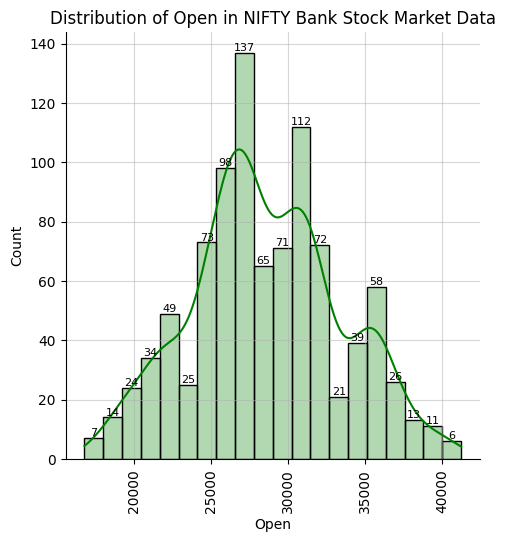

<Figure size 2000x600 with 0 Axes>

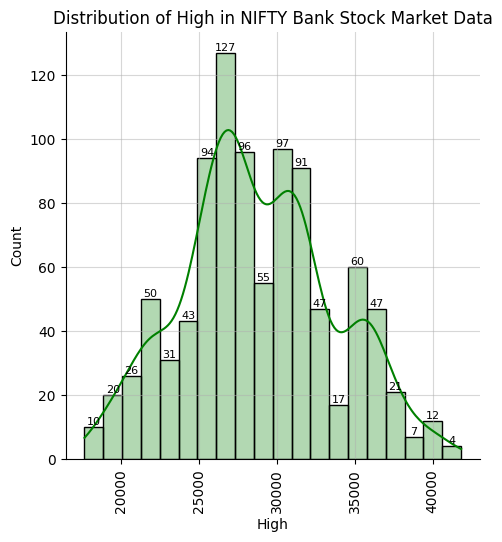

<Figure size 2000x600 with 0 Axes>

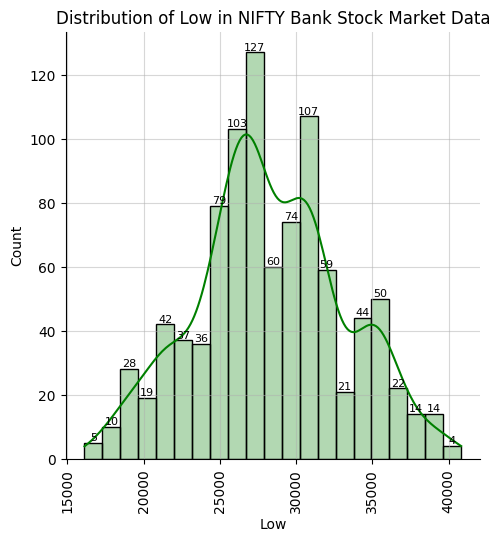

<Figure size 2000x600 with 0 Axes>

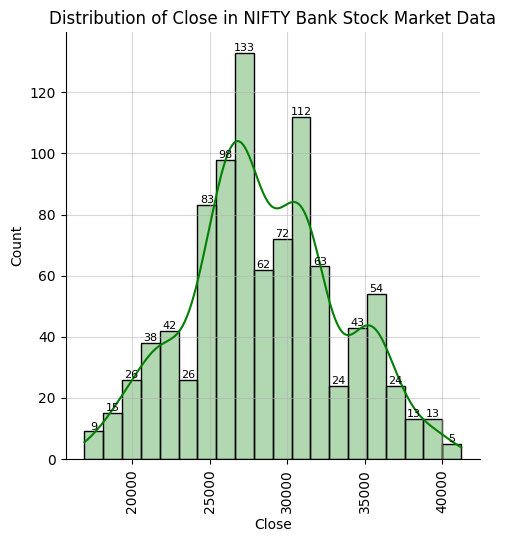

<Figure size 2000x600 with 0 Axes>

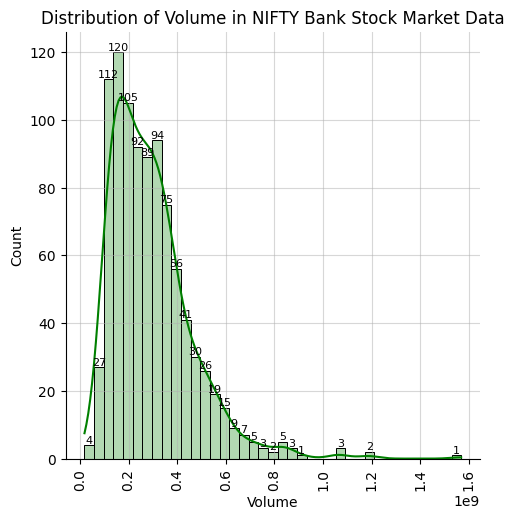

In [14]:
clns = ['Open', 'High', 'Low', 'Close','Volume']

for cl in clns:
    plt.figure(figsize=(20, 6))
    g = sns.displot(df[cl], kde=True,color='green',alpha=0.3)

    # Add labels to the bars
    for ax in g.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom', fontsize=8, color='black')

    # Set the plot title
    plt.title(f'Distribution of {cl} in NIFTY Bank Stock Market Data')

    # Customize other plot elements
    plt.grid(alpha=0.5)
    plt.xticks(rotation=90)
    plt.show()


### Outlier Detection

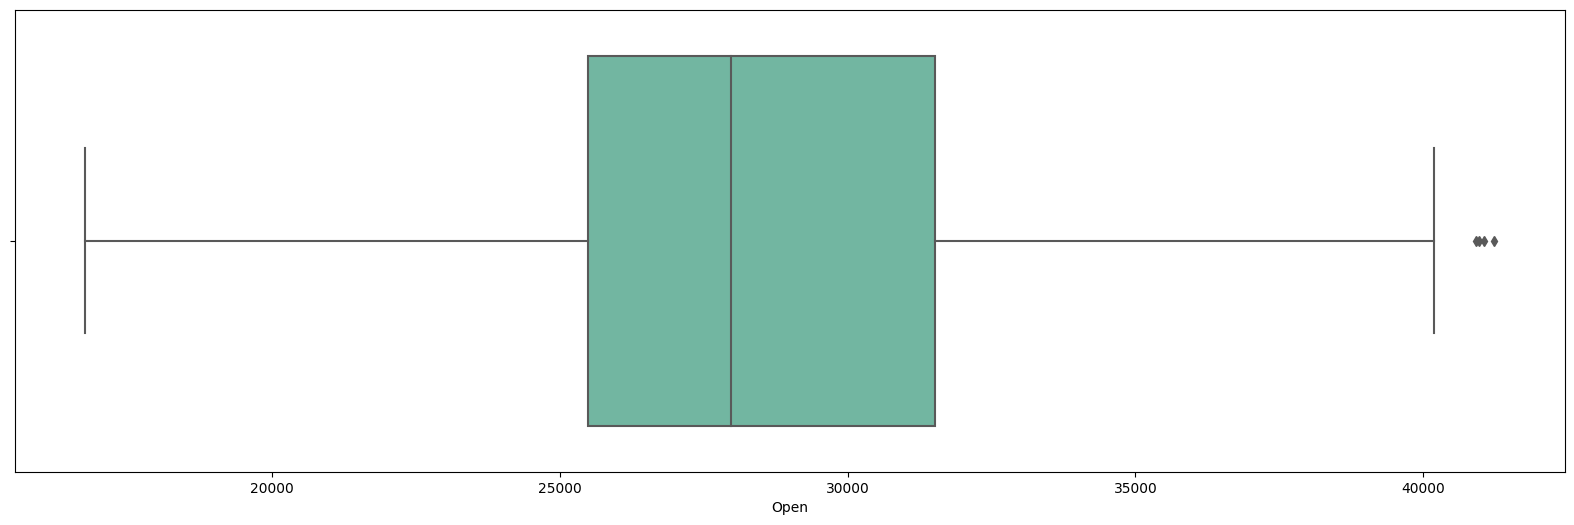

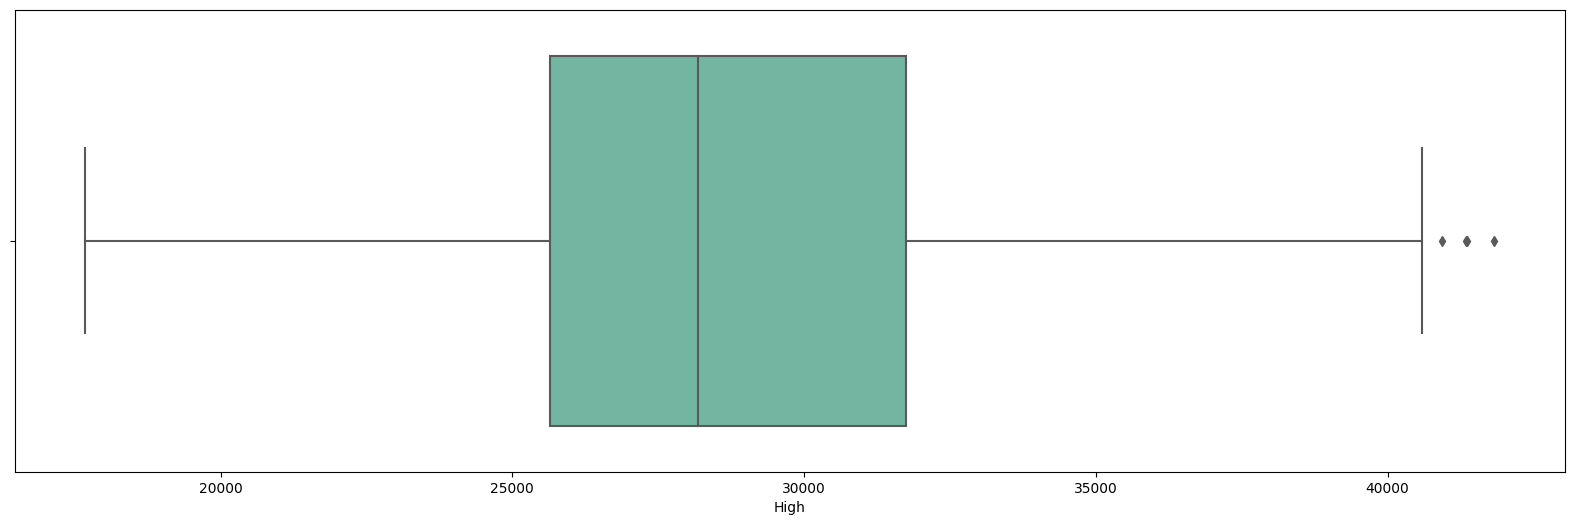

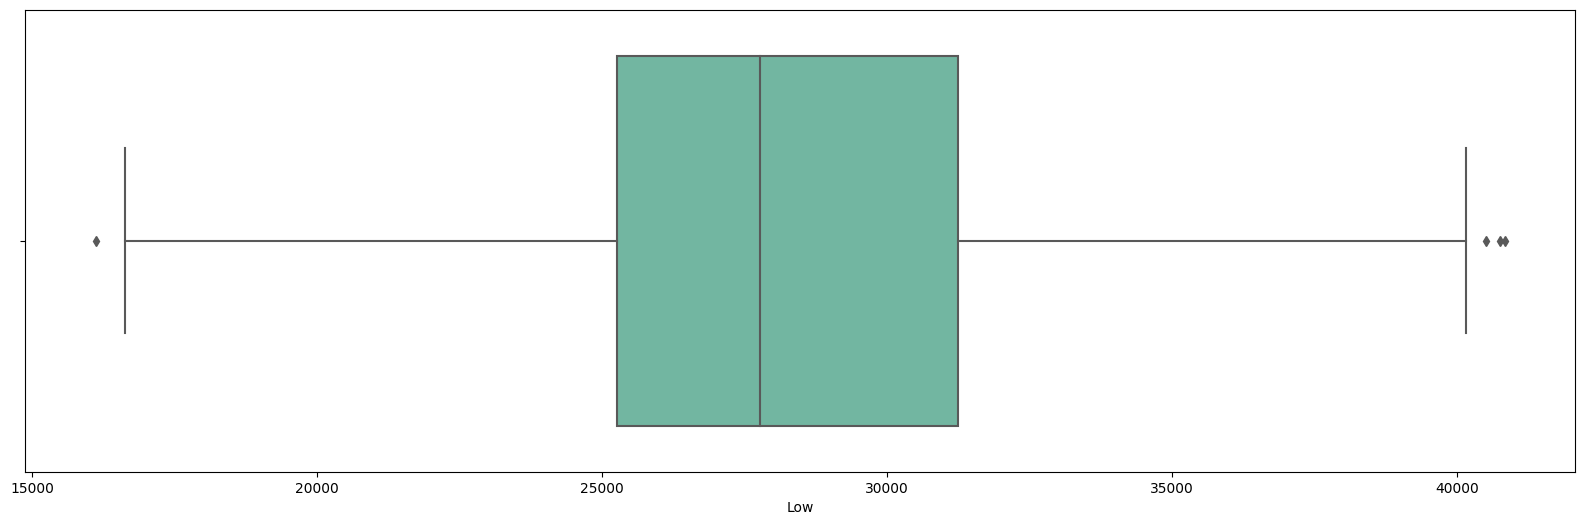

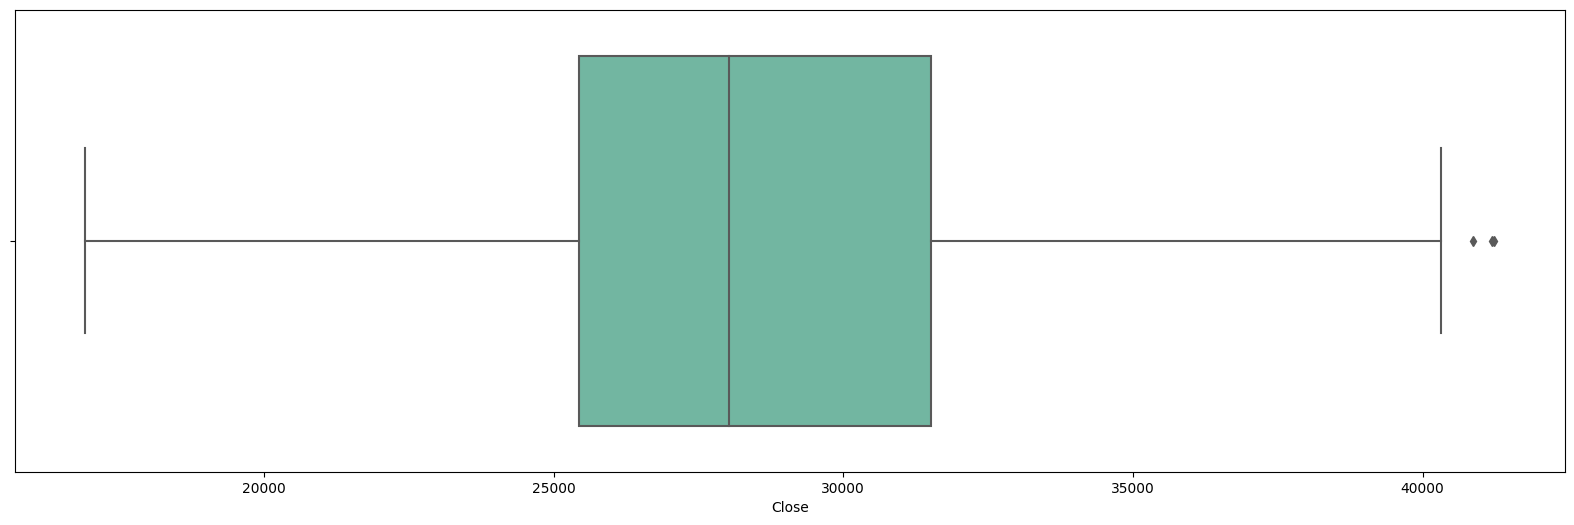

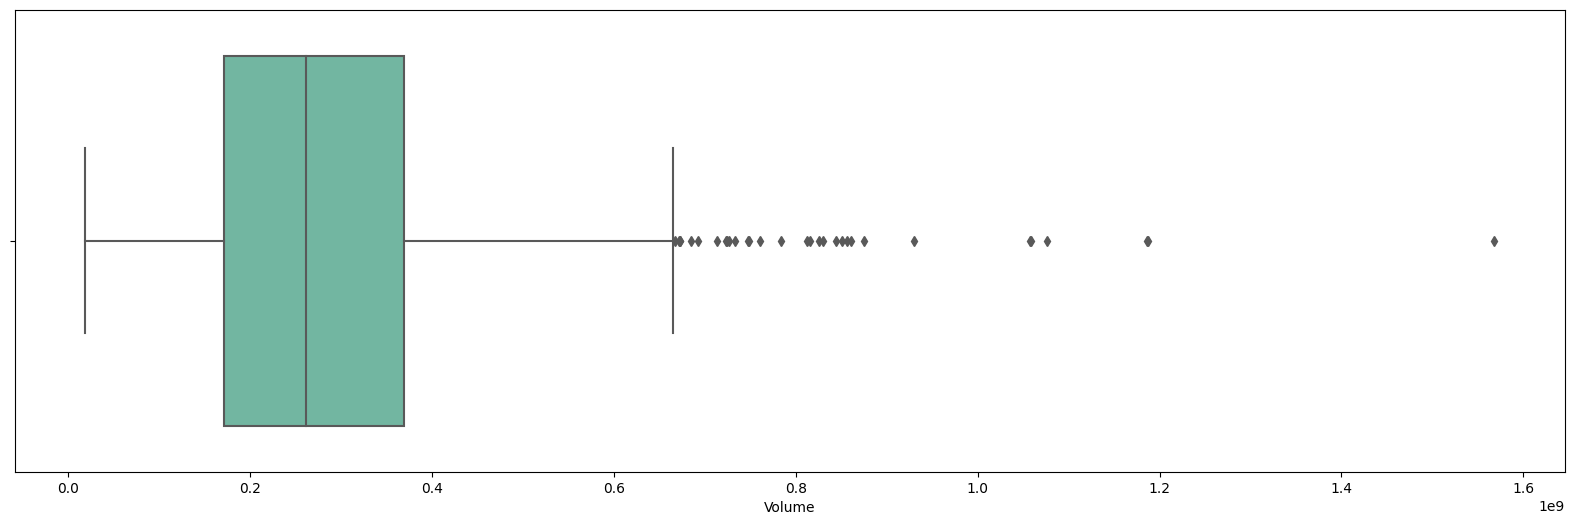

In [15]:
clns = ['Open', 'High', 'Low', 'Close','Volume']
for cl in clns:
    plt.figure(figsize = (20,6))
    sns.boxplot(x = df[cl],palette='Set2')
    plt.show()

###
* Presence of Outliers in the dataset
* These outliers will be addressed before proceeding with model building.


### Correlation Map

Text(0.5, 1.0, 'Correlation')

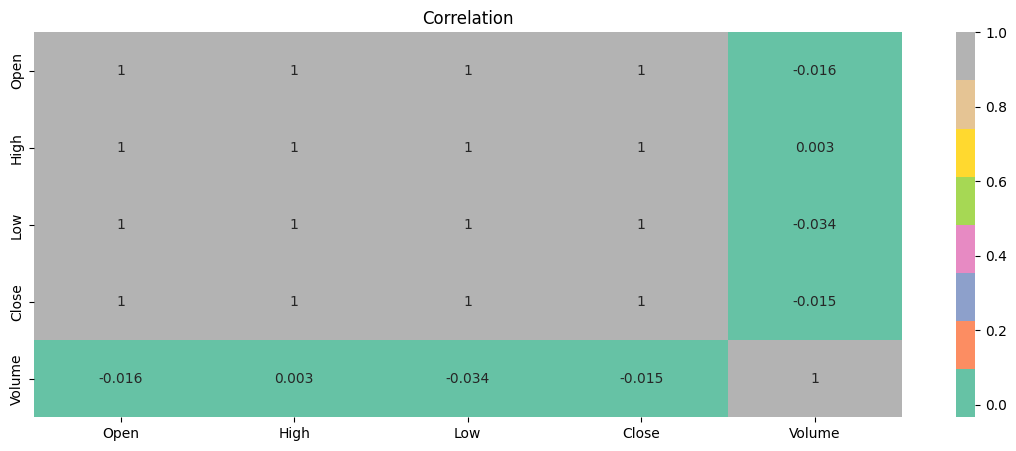

In [16]:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(),cmap='Set2',annot=True)
plt.title('Correlation')

## Feature Engineering & Data Pre-processing

### Handling Outliers

In [17]:
# Outlier Removal
clns = ['Open', 'High', 'Low', 'Close','Volume']
for col in clns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3 - q1
    lower_limit=q1 - 1.5*IQR
    upper_limit=q3 + 1.5*IQR
    df[col]=np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))


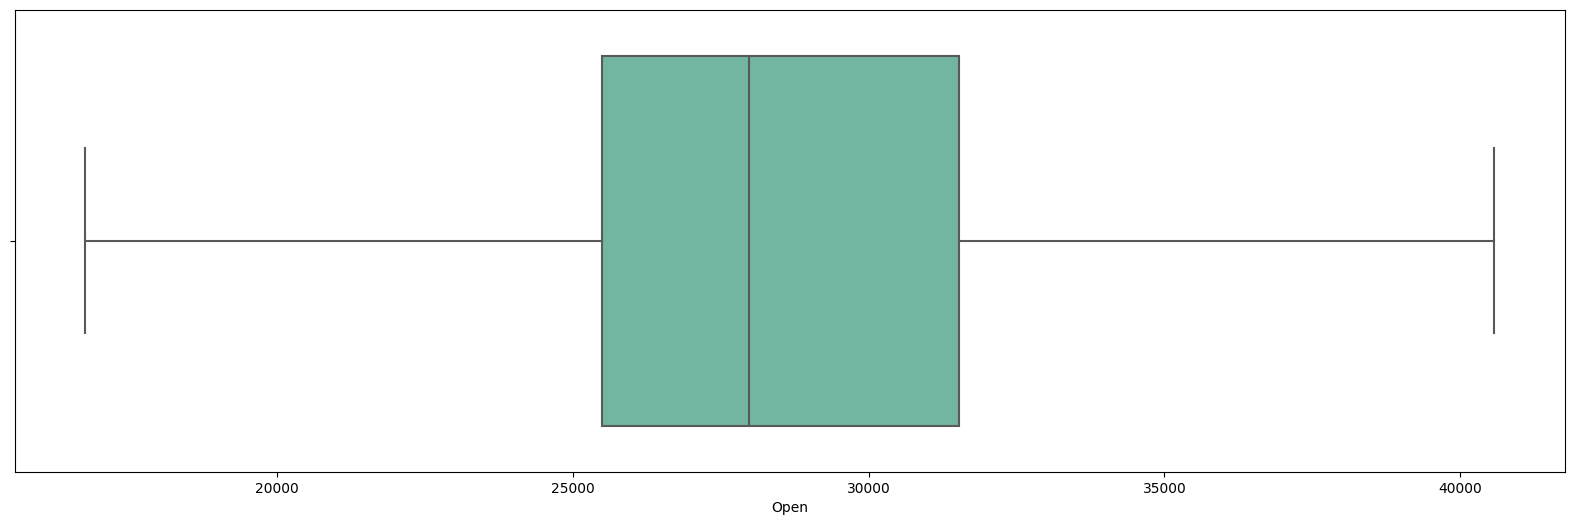

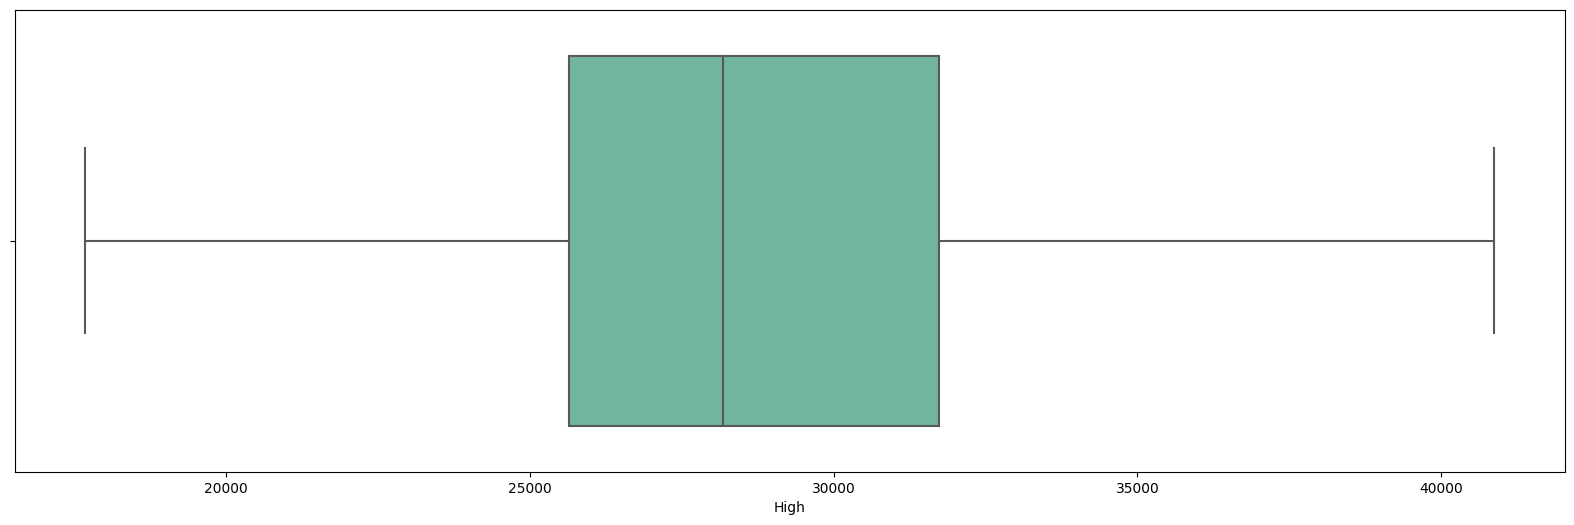

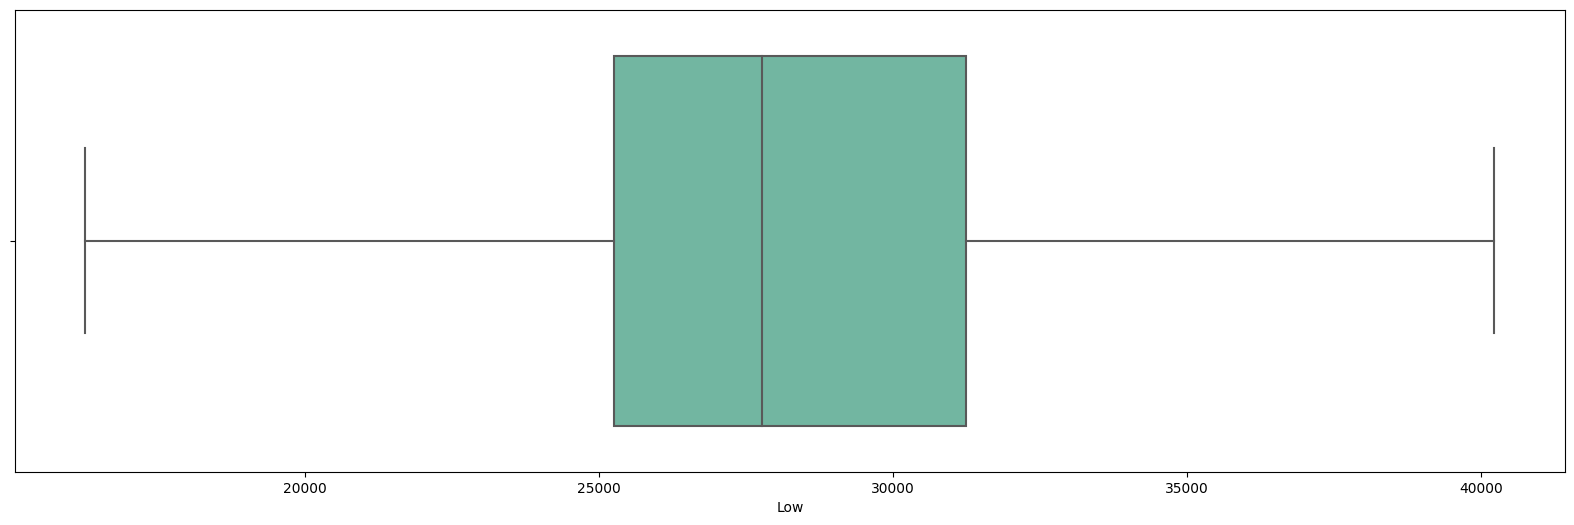

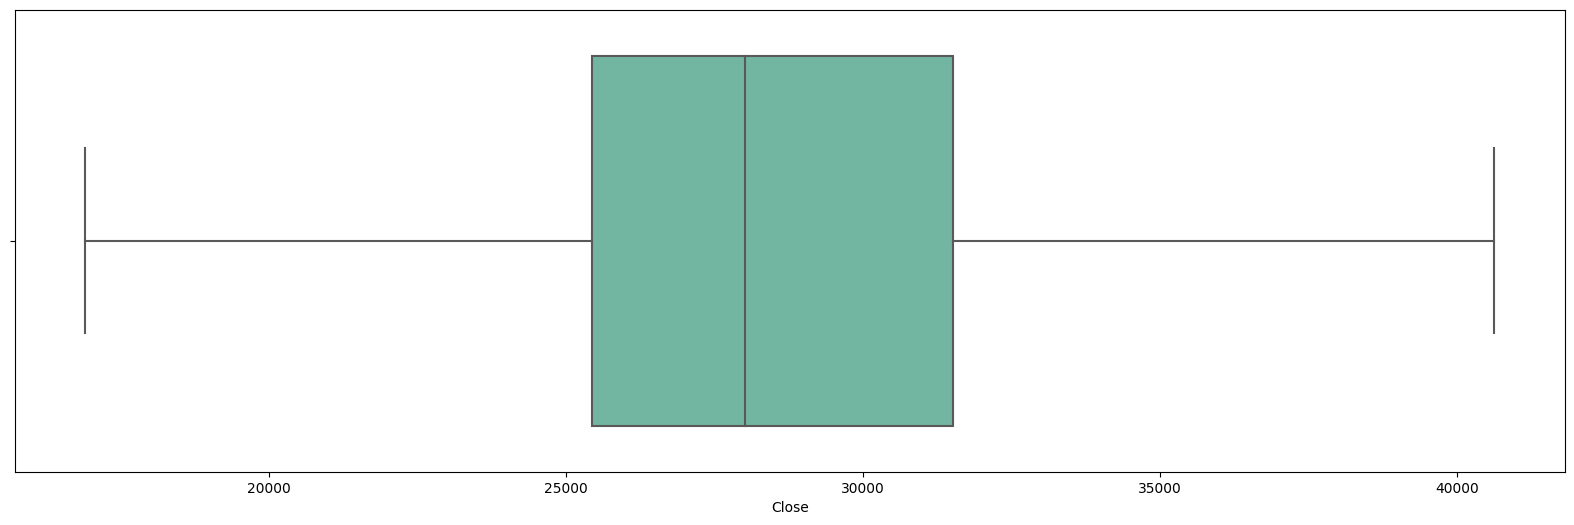

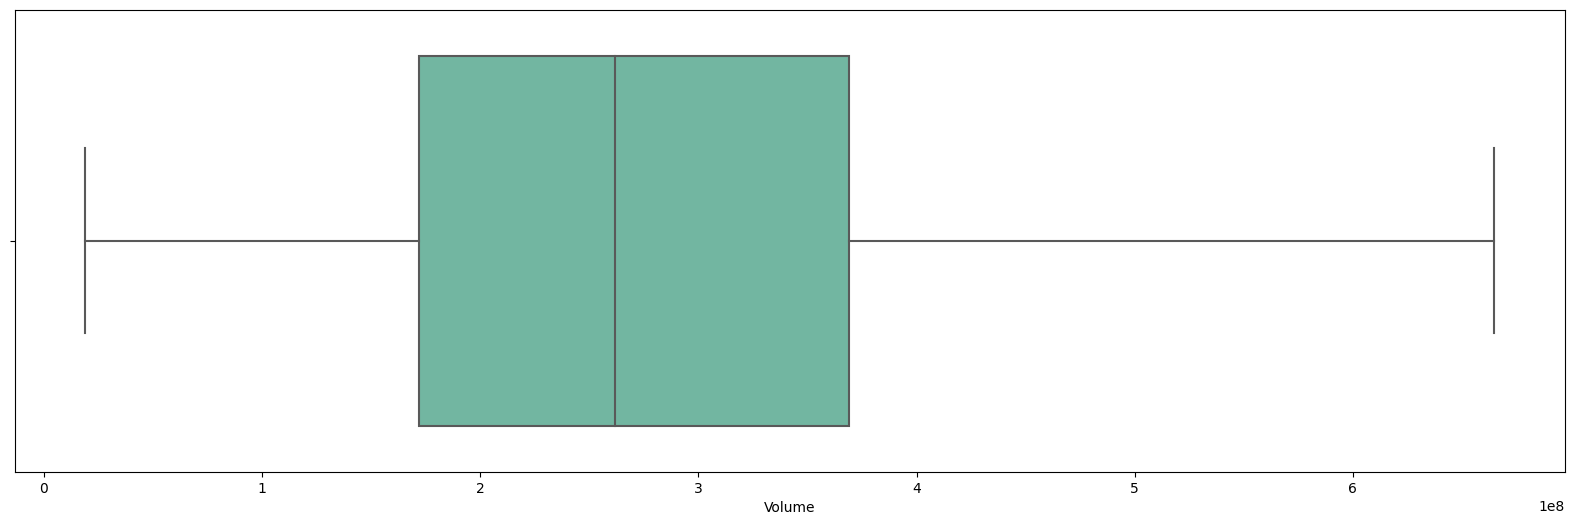

In [18]:
clns = ['Open', 'High', 'Low', 'Close','Volume']
for cl in clns:
    plt.figure(figsize = (20,6))
    sns.boxplot(x = df[cl],palette='Set2')
    plt.show()

### Creating new feature
* Creating new column 'Next Day' which stores the 'Close' value of the successive days

In [19]:
df["Next Day"] = df["Close"].shift(-1)
df

,Open,High,Low,Close,Volume,Next Day
Date,,,,,,
2018-01-01,25565.75,25588.00,25271.55,25318.10,57576913.0,25338.25
2018-01-02,25382.20,25425.50,25232.80,25338.25,72033811.0,25318.60
2018-01-03,25425.75,25454.90,25300.90,25318.60,59730356.0,25462.60
2018-01-04,25367.65,25490.35,25310.30,25462.60,105995860.0,25601.85
2018-01-05,25524.45,25643.35,25499.55,25601.85,123622612.0,25676.10
...,...,...,...,...,...,...
2021-11-03,40040.65,40160.20,39304.85,39402.05,267471244.0,39573.70
2021-11-04,39669.10,39734.70,39514.15,39573.70,38771464.0,39438.25
2021-11-08,39674.05,39674.05,38932.15,39438.25,212859120.0,39368.80


In [20]:
df.dropna(axis=0,inplace=True)

### 
* Creating Target Column : 
  1. When the target variable is set to 1, it indicates that the closing value of the stock on the next day is greater than the corresponding closing value.

  2. Similarly, when the target variable is set to 0, it indicates that the closing value of the stock on the next day is smaller than the corresponding closing value.

In [21]:
df['Target'] = (df['Next Day'] > df['Close']).astype(int)
df

,Open,High,Low,Close,Volume,Next Day,Target
Date,,,,,,,
2018-01-01,25565.75,25588.00,25271.55,25318.10,57576913.0,25338.25,1
2018-01-02,25382.20,25425.50,25232.80,25338.25,72033811.0,25318.60,0
2018-01-03,25425.75,25454.90,25300.90,25318.60,59730356.0,25462.60,1
2018-01-04,25367.65,25490.35,25310.30,25462.60,105995860.0,25601.85,1
2018-01-05,25524.45,25643.35,25499.55,25601.85,123622612.0,25676.10,1
...,...,...,...,...,...,...,...
2021-11-02,39796.90,40107.60,39590.70,39938.45,265000402.0,39402.05,0
2021-11-03,40040.65,40160.20,39304.85,39402.05,267471244.0,39573.70,1
2021-11-04,39669.10,39734.70,39514.15,39573.70,38771464.0,39438.25,0


In [22]:
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Volume,Next Day,Target
0,2018-01-01,25565.75,25588.00,25271.55,25318.10,57576913.0,25338.25,1
1,2018-01-02,25382.20,25425.50,25232.80,25338.25,72033811.0,25318.60,0
2,2018-01-03,25425.75,25454.90,25300.90,25318.60,59730356.0,25462.60,1
3,2018-01-04,25367.65,25490.35,25310.30,25462.60,105995860.0,25601.85,1
4,2018-01-05,25524.45,25643.35,25499.55,25601.85,123622612.0,25676.10,1
...,...,...,...,...,...,...,...,...
940,2021-11-02,39796.90,40107.60,39590.70,39938.45,265000402.0,39402.05,0
941,2021-11-03,40040.65,40160.20,39304.85,39402.05,267471244.0,39573.70,1
942,2021-11-04,39669.10,39734.70,39514.15,39573.70,38771464.0,39438.25,0
943,2021-11-08,39674.05,39674.05,38932.15,39438.25,212859120.0,39368.80,0


###  Data Transformation

In [23]:
# Skewness in Features
df.drop(columns='Date').skew()

Open        0.095825
High        0.137070
Low         0.044817
Close       0.084377
Volume      0.802351
Next Day    0.085675
Target     -0.116785
dtype: float64

In [24]:
# applying sqrt transformation on Volume column
df['Volume'] = np.sqrt(df['Volume'])

In [25]:
df['Volume'].skew()

0.3039322461141587

### Data Scaling

In [26]:
# Scaling your data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df.drop(columns=['Date','Target']))

In [27]:
df1=pd.DataFrame(scaled_data, columns=['Open','High','Low','Close','Volume','Next Day'])

In [28]:
df1

,Open,High,Low,Close,Volume,Next Day
0,-0.625782,-0.670656,-0.626531,-0.671507,-2.082773,-0.668734
1,-0.663982,-0.704550,-0.634579,-0.667317,-1.870942,-0.672812
2,-0.654919,-0.698417,-0.620435,-0.671403,-2.049656,-0.642934
3,-0.667010,-0.691023,-0.618483,-0.641460,-1.445044,-0.614042
4,-0.634377,-0.659111,-0.579178,-0.612504,-1.251158,-0.598636
...,...,...,...,...,...,...
940,2.335973,2.357821,2.347398,2.368627,-0.035695,2.249287
941,2.386701,2.368792,2.288030,2.257089,-0.017861,2.284902
942,2.309375,2.280042,2.331499,2.292781,-2.403411,2.256798
943,2.310405,2.267392,2.210624,2.264616,-0.433560,2.242388


### Data Splitting

In [29]:
X=df1
y=df['Target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=19)

##  ML Model Implementation

In [30]:
features=['Open','High','Low','Close','Volume','Next Day']

In [31]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    try:
      try:
        feature_importance = model.feature_importances_
      except:
        feature_importance = model.coef_
      feature_importance = np.absolute(feature_importance)
      if len(feature_importance)==len(features):
        pass
      else:
        feature_importance = feature_importance[0]


      feat = pd.Series(feature_importance, index=features)
      feat = feat.sort_values(ascending=True)
      plt.figure(figsize=(10,6))
      plt.title('Feature Importances for '+str(model), fontsize = 18)
      plt.xlabel('Relative Importance')
      feat.plot(kind='barh')
    except AttributeError:
        print("\nThe model does not have feature importances attribute.")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [32]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

###  Logistic Regression

In [33]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Train ROC AUC: 0.9012986775103492
Test ROC AUC: 0.8734725954469402


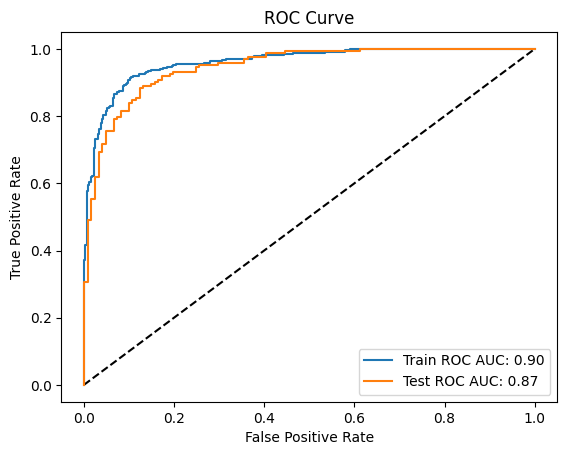


Confusion Matrix:


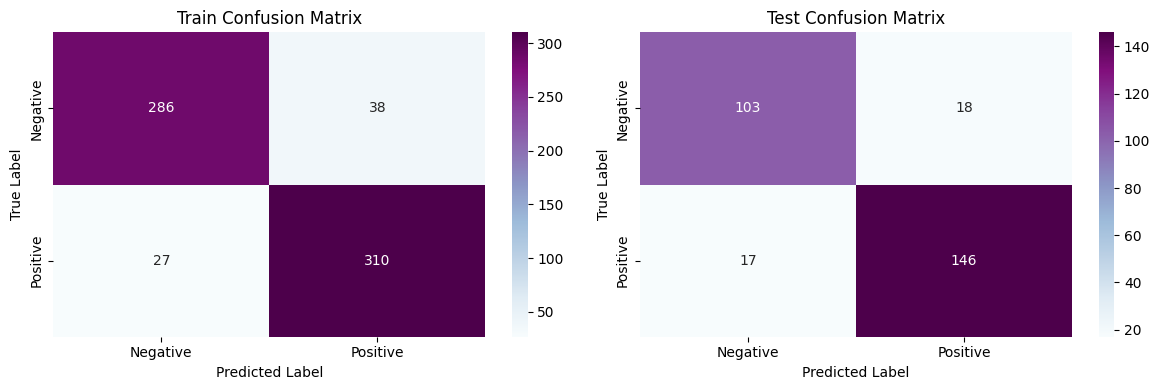


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.913738 | 0.882716 |   0.897959 | 324        |
| 1            |    0.890805 | 0.919881 |   0.905109 | 337        |
| accuracy     |    0.901664 | 0.901664 |   0.901664 |   0.901664 |
| macro avg    |    0.902271 | 0.901299 |   0.901534 | 661        |
| weighted avg |    0.902046 | 0.901664 |   0.901605 | 661        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.858333 | 0.85124  |   0.854772 | 121        |
| 1            |    0.890244 | 0.895706 |   0.892966 | 163        |
| accuracy     |    0.876761 | 0.876761 |   0.876761 |   0.876761 |
| macro avg    |    0.874289 | 0.873473 |   0.873869 | 284        |
| weighted avg |    0.876648 | 0.876761 |   0.876693 | 28

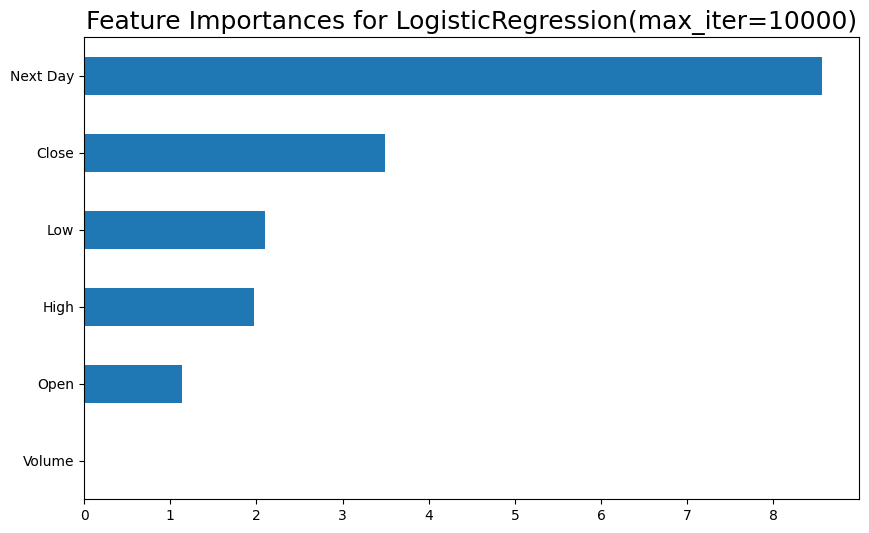

In [34]:
lr_score = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

In [35]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.902046
Precision Test,0.876648
Recall Train,0.901664
Recall Test,0.876761
Accuracy Train,0.901664
Accuracy Test,0.876761
ROC-AUC Train,0.901299
ROC-AUC Test,0.873473
F1 macro Train,0.901605
F1 macro Test,0.876693


### Cross- Validation & Hyperparameter Tuning

In [36]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
# The best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [37]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Train ROC AUC: 0.9970326409495549
Test ROC AUC: 0.9866653146073113


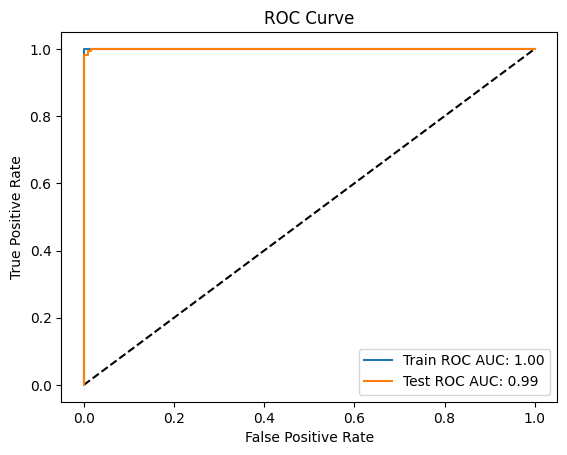


Confusion Matrix:


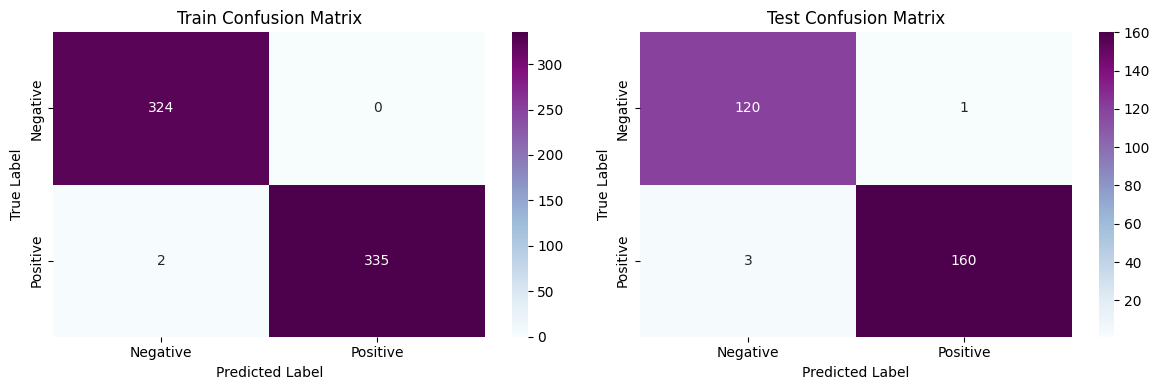


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.993865 | 1        |   0.996923 | 324        |
| 1            |    1        | 0.994065 |   0.997024 | 337        |
| accuracy     |    0.996974 | 0.996974 |   0.996974 |   0.996974 |
| macro avg    |    0.996933 | 0.997033 |   0.996973 | 661        |
| weighted avg |    0.996993 | 0.996974 |   0.996974 | 661        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.97561  | 0.991736 |   0.983607 | 121        |
| 1            |    0.993789 | 0.981595 |   0.987654 | 163        |
| accuracy     |    0.985915 | 0.985915 |   0.985915 |   0.985915 |
| macro avg    |    0.984699 | 0.986665 |   0.98563  | 284        |
| weighted avg |    0.986044 | 0.985915 |   0.98593  | 28

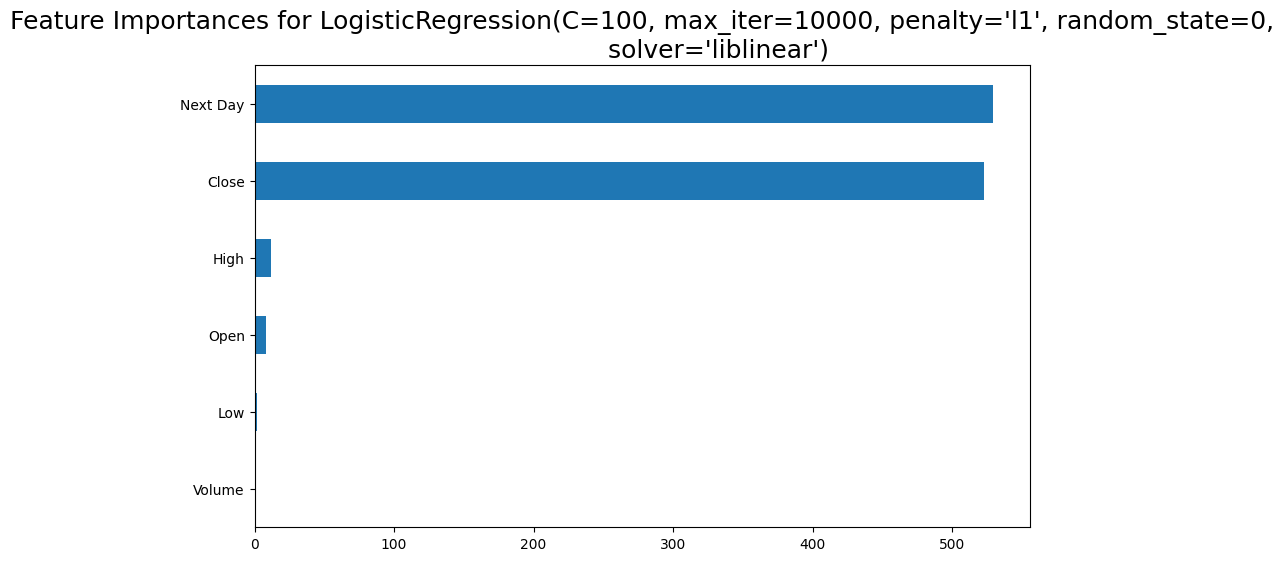

In [38]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_train, X_test, y_train, y_test)

In [39]:
score['Logistic regression tuned'] = lr_score2
score

,Logistic regression,Logistic regression tuned
Precision Train,0.902046,0.996993
Precision Test,0.876648,0.986044
Recall Train,0.901664,0.996974
Recall Test,0.876761,0.985915
Accuracy Train,0.901664,0.996974
Accuracy Test,0.876761,0.985915
ROC-AUC Train,0.901299,0.997033
ROC-AUC Test,0.873473,0.986665
F1 macro Train,0.901605,0.996974
F1 macro Test,0.876693,0.985930


## Conclusion

* The tuned logistic regression model significantly outperformed the logistic regression model for stock market prediction.
* The precision of the tuned model on the testing dataset improved from 0.877 to 0.986, indicating a higher proportion of correctly predicted positive instances.
* The recall for the tuned model increased from 0.877 to 0.986, indicating a better ability to capture actual positive instances.
* The accuracy of the tuned model rose from 0.877 to 0.986, demonstrating overall higher correctness in predictions.
* The ROC-AUC score for the tuned model increased from 0.873 to 0.987, indicating improved discrimination capability.
* The F1 macro score for the tuned model improved from 0.877 to 0.986, reflecting a better balance between precision and recall.
* The feature importance analysis revealed that the "Next Day" feature had the highest influence, followed by "Close," "High," "Open," "Low," and "Volume."
* These findings highlight the effectiveness of the tuned logistic regression model in accurately predicting stock market movements by considering multiple factors.